In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler


from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [80]:
df=pd.read_csv('rIEXKr.csv',index_col='Unnamed: 0')
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [82]:
df.shape

(569, 31)

In [84]:
df.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

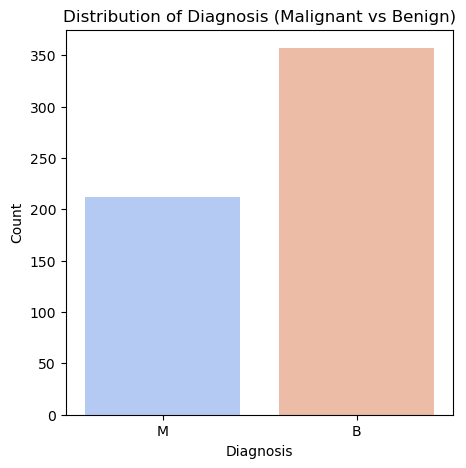

In [86]:
plt.figure(figsize=(5,5))
sns.countplot(x='Diagnosis',data=df,palette='coolwarm')
plt.title('Distribution of Diagnosis (Malignant vs Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()



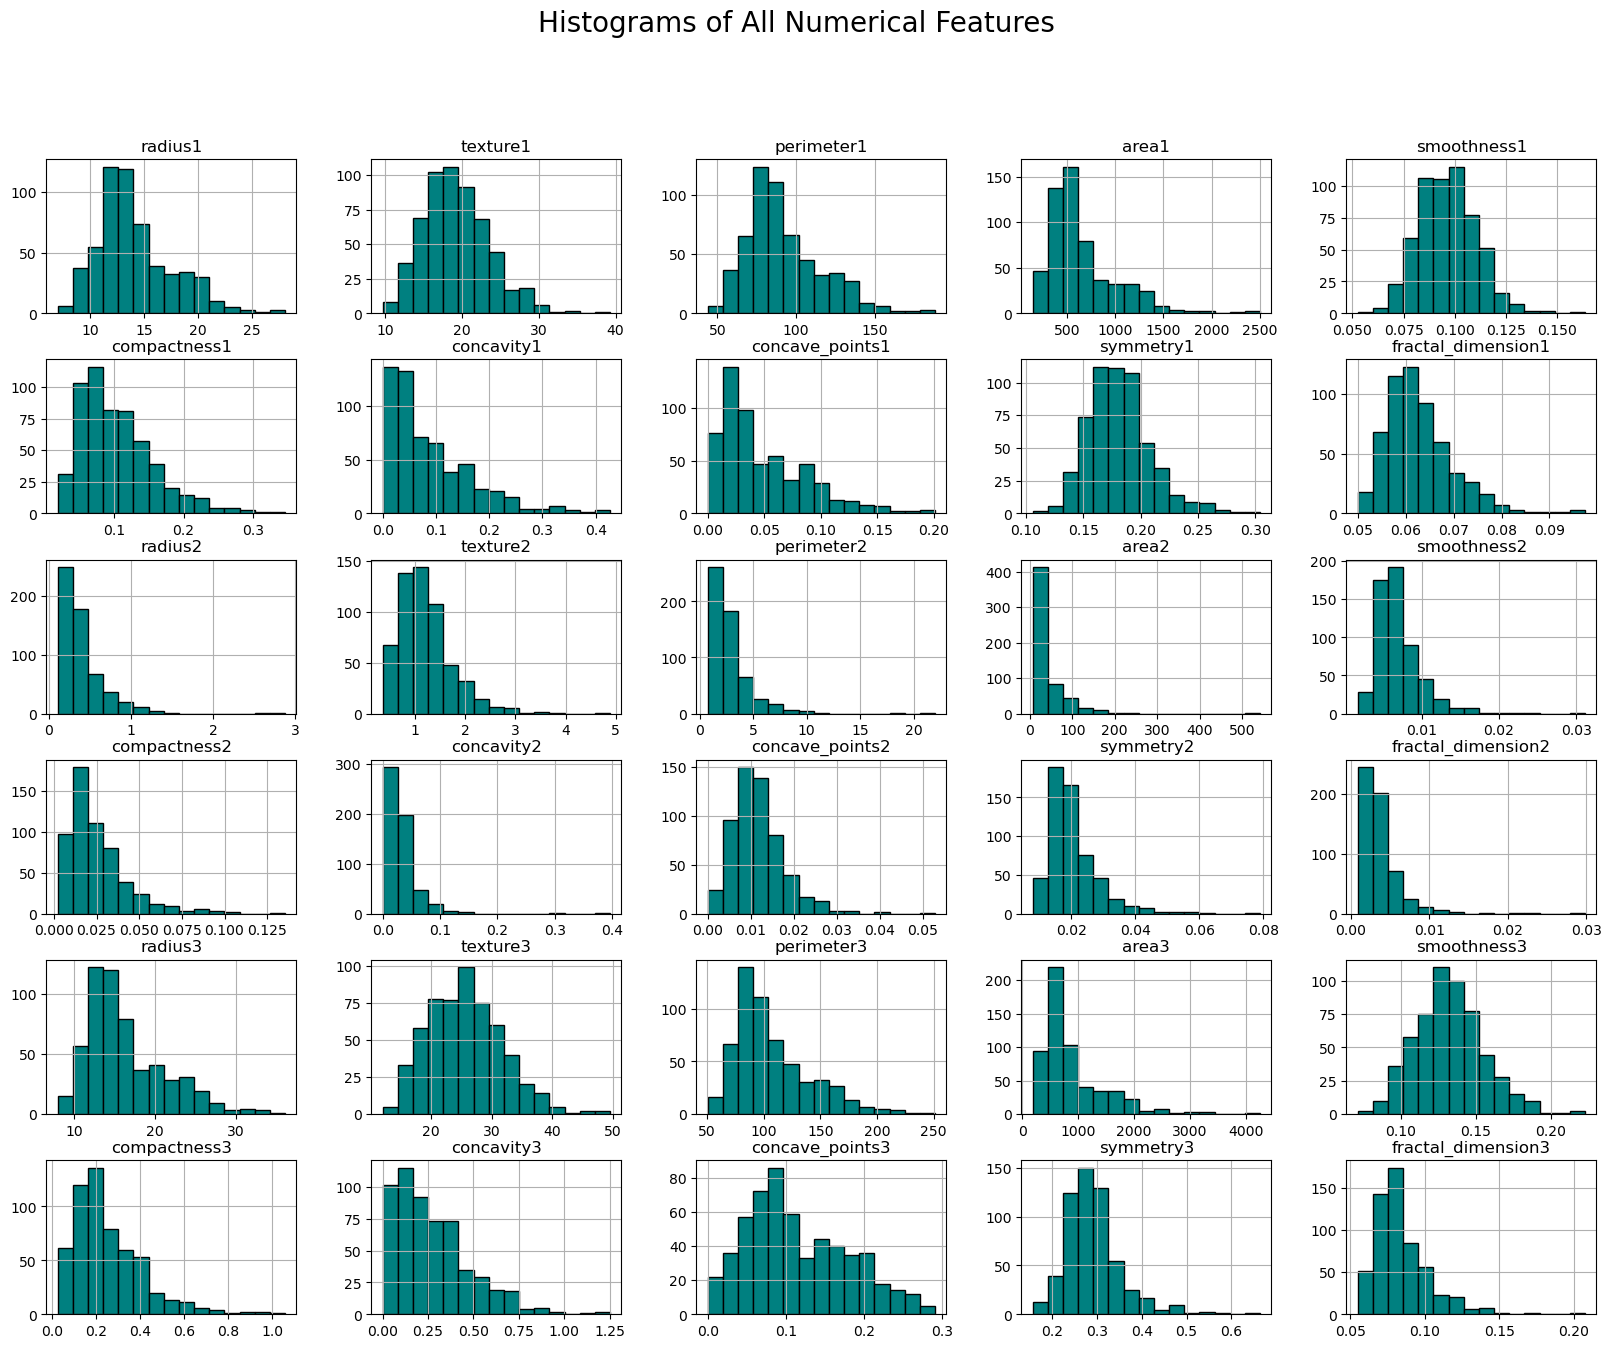

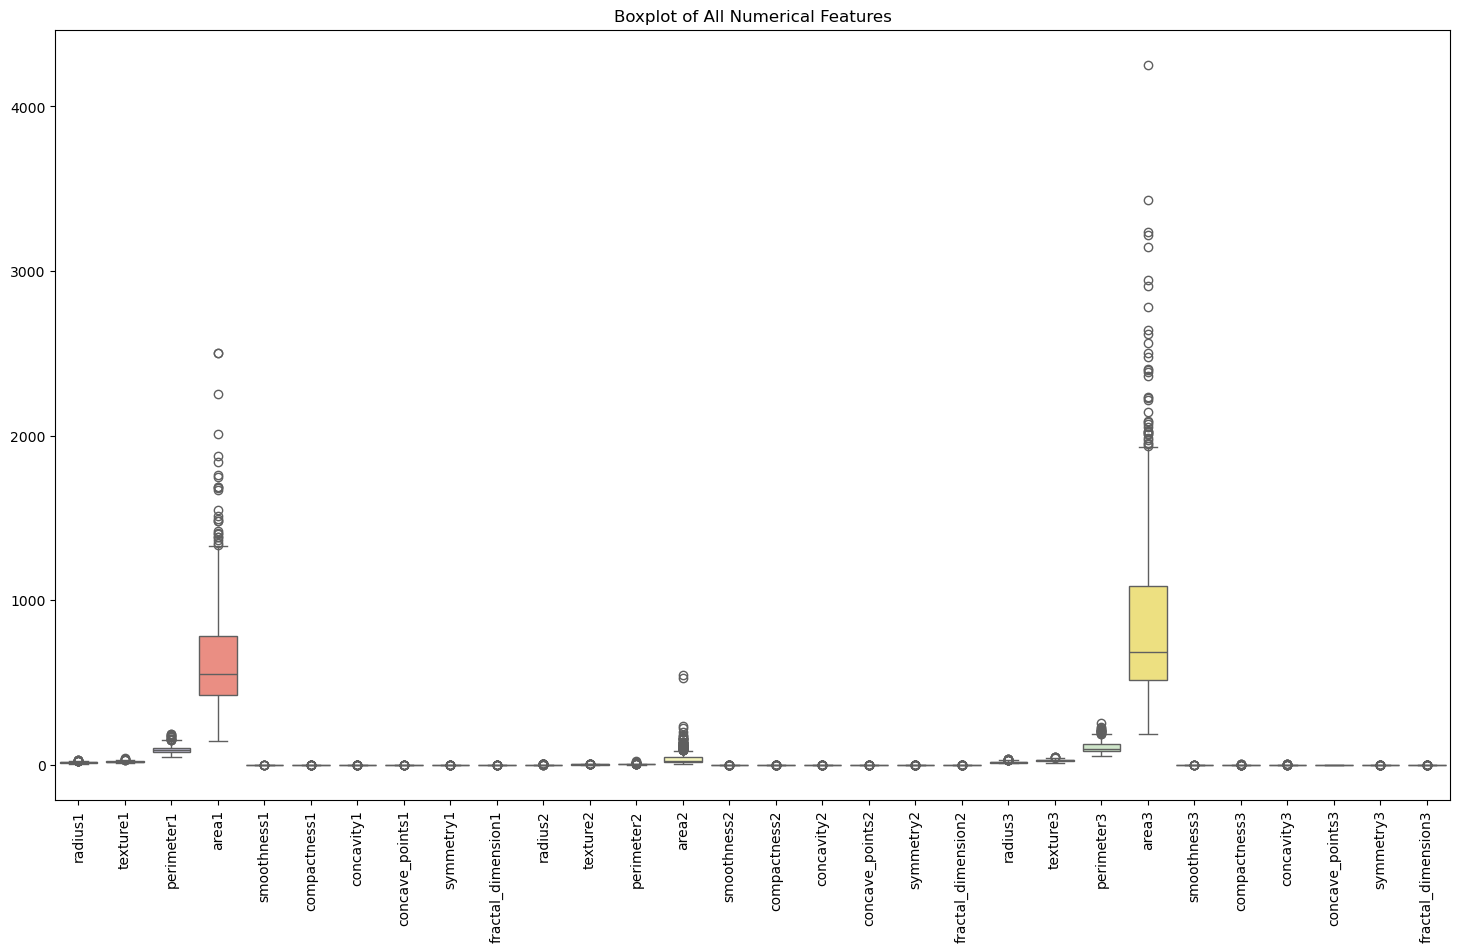

In [89]:
df.hist(bins=15, figsize=(20, 15), color='teal', edgecolor='black')
plt.suptitle('Histograms of All Numerical Features', fontsize=20)
plt.show()

# Boxplots for identifying outliers
plt.figure(figsize=(18, 10))
sns.boxplot(data=df.drop(columns=['Diagnosis']), palette="Set3")
plt.title('Boxplot of All Numerical Features')
plt.xticks(rotation=90)
plt.show()



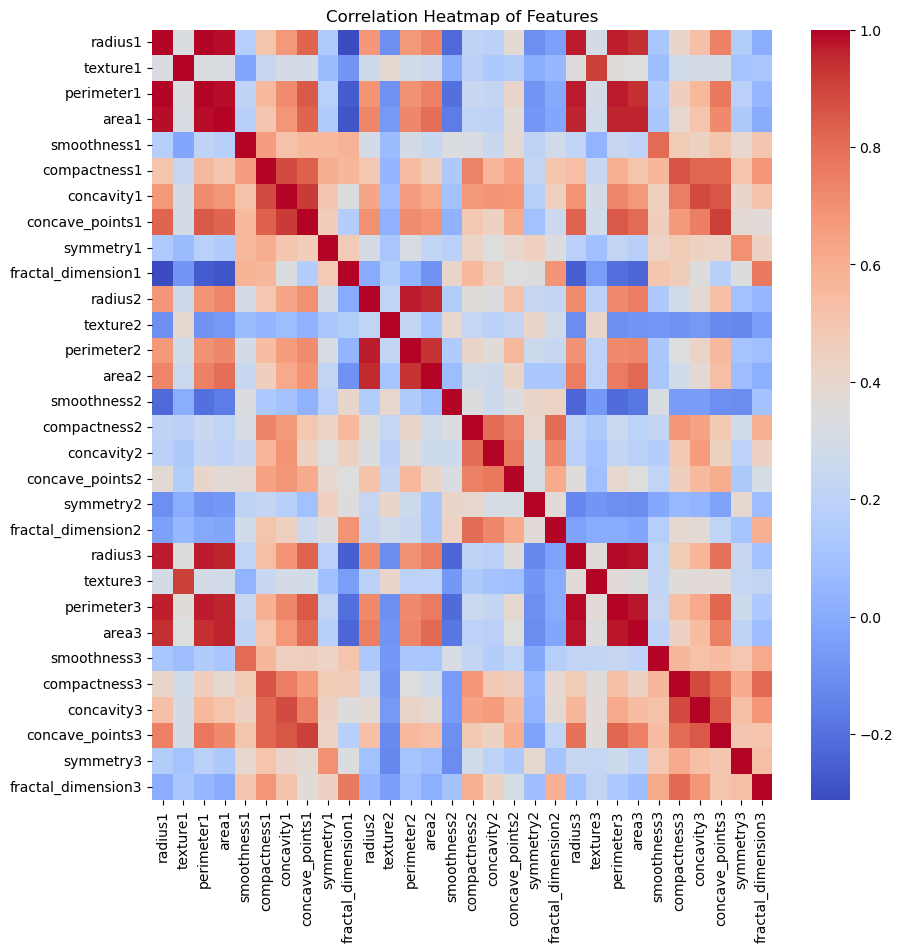


Highly Correlated Features (Correlation > 0.75):
                     radius1  texture1  perimeter1     area1  smoothness1  \
radius1             1.000000       NaN    0.997855  0.987357          NaN   
texture1                 NaN  1.000000         NaN       NaN          NaN   
perimeter1          0.997855       NaN    1.000000  0.986507          NaN   
area1               0.987357       NaN    0.986507  1.000000          NaN   
smoothness1              NaN       NaN         NaN       NaN     1.000000   
compactness1             NaN       NaN         NaN       NaN          NaN   
concavity1               NaN       NaN         NaN       NaN          NaN   
concave_points1     0.822529       NaN    0.850977  0.823269          NaN   
symmetry1                NaN       NaN         NaN       NaN          NaN   
fractal_dimension1       NaN       NaN         NaN       NaN          NaN   
radius2                  NaN       NaN         NaN       NaN          NaN   
texture2                 N

In [119]:
plt.figure(figsize=(10, 10))
correlation_matrix = data.drop(columns=['Diagnosis']).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()
high_correlation = correlation_matrix[correlation_matrix > 0.75]
print("\nHighly Correlated Features (Correlation > 0.75):")
print(high_correlation)

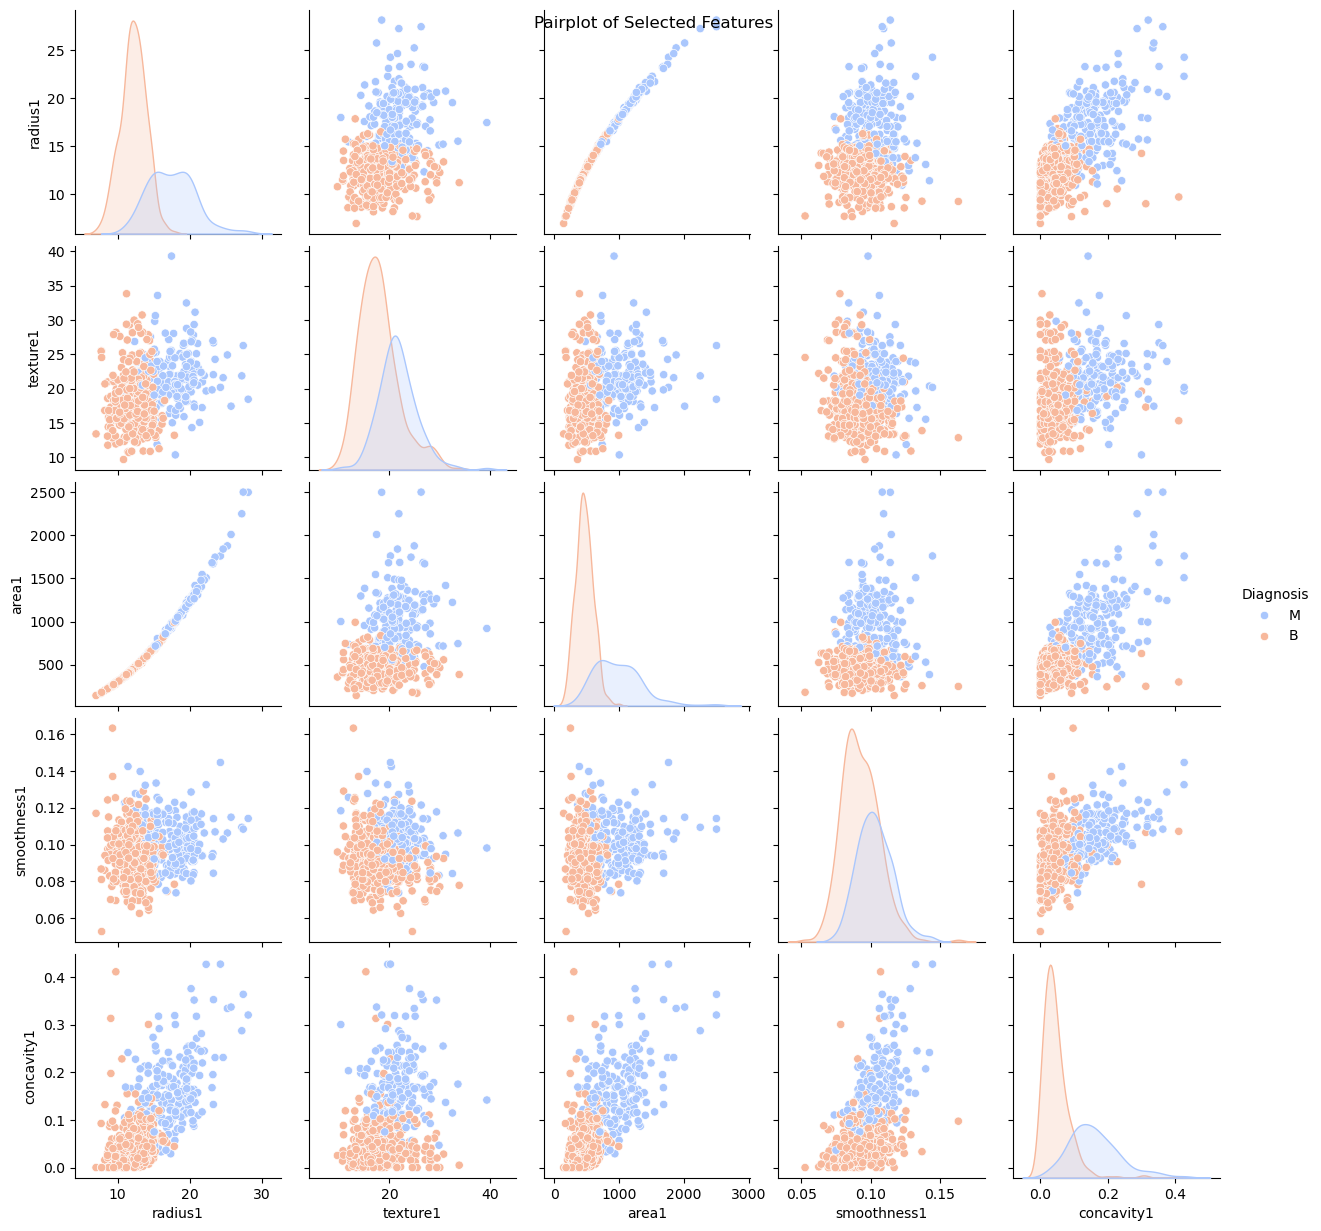

In [121]:
selected_features = ['radius1', 'texture1', 'area1', 'smoothness1', 'concavity1']
sns.pairplot(data[selected_features + ['Diagnosis']], hue='Diagnosis', palette='coolwarm')
plt.suptitle('Pairplot of Selected Features')
plt.show()

In [127]:
z_scores = np.abs(zscore(data.drop(columns=['Diagnosis'])))
outliers = (z_scores > 3).sum(axis=0)
print("\nOutliers Detected (Z-score > 3):")
print(outliers)


Outliers Detected (Z-score > 3):
radius1                5
texture1               4
perimeter1             7
area1                  8
smoothness1            5
compactness1           9
concavity1             9
concave_points1        6
symmetry1              5
fractal_dimension1     7
radius2                7
texture2               9
perimeter2             8
area2                  6
smoothness2            7
compactness2          12
concavity2             6
concave_points2        6
symmetry2             11
fractal_dimension2    10
radius3                6
texture3               4
perimeter3             6
area3                 10
smoothness3            3
compactness3          10
concavity3             7
concave_points3        0
symmetry3              9
fractal_dimension3     9
dtype: int64


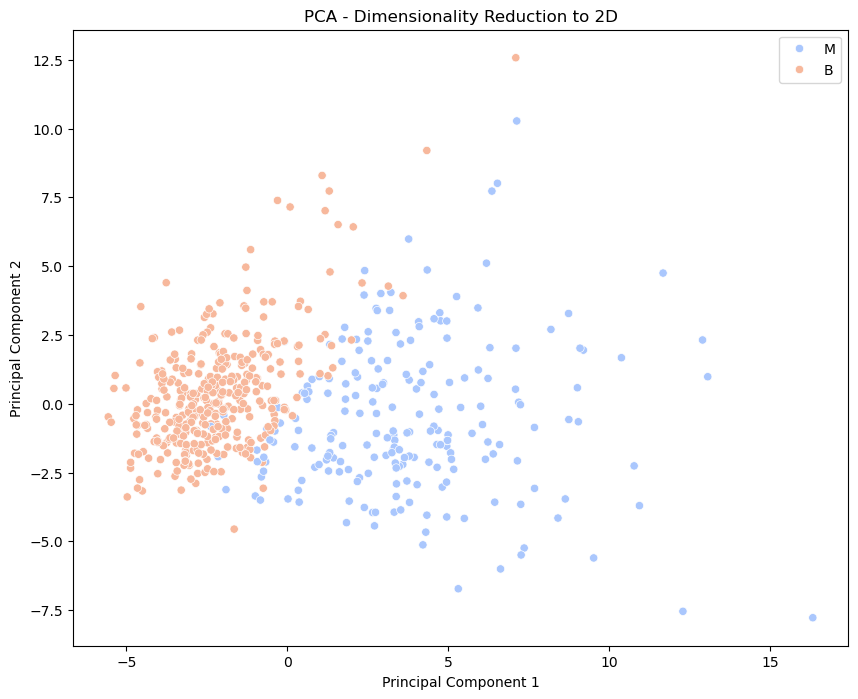

In [129]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Diagnosis']))
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = data['Diagnosis']
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette='coolwarm')
plt.title('PCA - Dimensionality Reduction to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x=df.drop('Diagnosis',axis=1)
y=df["Diagnosis"]


In [93]:
x.shape

(569, 30)

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
model1=KNeighborsClassifier()
model2=SVC(kernel='rbf' , degree=3 , gamma='auto')
model3 =RandomForestClassifier(n_estimators = 100 , n_jobs = 1,random_state =40)
model4 =LogisticRegression()

In [96]:
def all_model(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    model.score(x_test,y_test)
    print(classification_report (y_test,pre))


In [97]:
all_model(model1)

              precision    recall  f1-score   support

           B       0.93      1.00      0.97        71
           M       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [98]:
all_model(model2)

              precision    recall  f1-score   support

           B       0.62      1.00      0.77        71
           M       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



In [99]:
all_model(model3)

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [101]:
all_model(model4)

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



KNeighborsClassifier, RandomForestClassifier and LogisticRegression are best model